# U.S. Bank Failure Analysis 

Data: https://catalog.data.gov/dataset/fdic-failed-bank-list


The inspiration for project comes from my curiosity about recurring financial and economic problems especially after the recent 2008 recession. I will be focusing more on this period of the data from 2000-2017. The data dates back to 1934 and expresses the following values:

**1. Institution name and FIN number

**2. Charter type

**3. Location of headquarters (city and state)

**4. Effective date

**5. Insurance fund and certificate number

**6. Failure transaction type

**7. Total deposits and total assets last reported prior to failure (in thousands of dollars)


There are several challenges to this dataset. 

**First, different periods will have to be excluded from different forms of analysis. For instance:

Estimated cost of resolution (Data on estimated losses are not available for FDIC insured failures prior to 1986 or for FSLIC insured failures from 1934-88. The data in this period from 1934-88 can be included in all forms of interpretation except where estimated loss data is needed.
I will consider the failures after 1988 where data exists for estimated losses as significant.

**Second, a large dataset with many values which values to consider, took some time. I focused on Instituion Name (not fin number),Charter Type,Location of headquarters (city and state), and Total deposits and total assets last reported prior to failure (in thousands of dollars)

**Third, I believe that the correlation between other variables can be significant.

For the purposes of this project I am limited to the values within the confines of the dataset. Additionally I am keen on merging this dataset with others that might serve to enrich the alaysis of this report. 

Looking forward toward future work on bank failures. 
I beleive that further research in this subject will bear useful for my work in the fintech industry where this kind of analysis will be valuable.

# Analytic Questions

1. How have institution failures changed over time; which institution is most likely to fail? 

2. How expensive were institution failures in each period relative to other periods?

3. Which states had the highest failures; which cost the government the most to resolve?

In [2]:
# Importing the necessary libraries to organize the data into a meaningful story through 
#the combination of statistical, visual, and narrative story telling tools.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sy
from scipy.stats.stats import pearsonr
%matplotlib inline

ModuleNotFoundError: No module named 'matplotlib'

In [3]:
# Reading the banks.csv file stored in my desktop
banks = pd.read_csv('banks.csv')

FileNotFoundError: File b'banks.csv' does not exist

In [99]:
#I want to note the size of the dataset at the start to show that we are working with a nice sized dataset to analyze
len(banks)

3484

In [100]:
#Calling up the top 5 banks to see how the data and its values are organized in an array
banks.head()

,Financial Institution Number,Institution Name,Institution Type,Charter Type,Headquarters,Failure Date,Insurance Fund,Certificate Number,Transaction Type,Total Deposits,Total Assets,Estimated Loss (2015)
0,NaN,BANK OF AMERICA TRUST CO.,COMMERCIAL BANK,STATE,"PITTSBURGH, PA",4/19/1934,FDIC,NaN,PAYOUT,1064,1435.0,NaN
1,NaN,FON DU LAC STATE BANK,COMMERCIAL BANK,STATE,"EAST PEORIA, IL",5/28/1934,FDIC,NaN,PAYOUT,238,374.0,NaN
2,NaN,FIRST NATIONAL BANK OF LIMA,COMMERCIAL BANK,FEDERAL,"LIMA, MT",7/18/1934,FDIC,NaN,PAYOUT,42,91.0,NaN
3,NaN,FLORENCE DEPOSIT BANK,COMMERCIAL BANK,STATE,"FLORENCE, IN",7/18/1934,FDIC,NaN,PAYOUT,69,105.0,NaN
4,NaN,BANK OF LEWISPORT,COMMERCIAL BANK,STATE,"LEWISPORT, KY",8/6/1934,FDIC,NaN,PAYOUT,68,81.0,NaN


In [101]:
#Extracting out failure year; organizing the formatting of the values city and state.
banks['Failure Year']=banks['Failure Date'].apply(lambda x: int(x.split('/')[2]))
banks['City']=banks['Headquarters'].apply(lambda x:(x.split(',')[0]))
banks['State']=banks['Headquarters'].apply(lambda x:(x.split(', ')[1]))

In [102]:
#Examining how much missing data is present to futher clean the data
banks.isnull().sum()

Financial Institution Number    601
Institution Name                  0
Institution Type                  0
Charter Type                      0
Headquarters                      0
Failure Date                      0
Insurance Fund                    0
Certificate Number              485
Transaction Type                  0
Total Deposits                    0
Total Assets                    151
Estimated Loss (2015)           975
Failure Year                      0
City                              0
State                             0
dtype: int64

In [103]:
#Summary Statistics, these summarize and inform on the following values in my dataset
banks[['Total Deposits', 'Total Assets', 'Estimated Loss (2015)', 'Failure Year']].describe()

,Total Deposits,Total Assets,Estimated Loss (2015),Failure Year
count,3.484000e+03,3.333000e+03,2.509000e+03,3484.000000
mean,2.997762e+05,4.045884e+05,7.064435e+04,1985.213261
std,3.304676e+06,5.454873e+06,3.305872e+05,19.654791
min,0.000000e+00,1.400000e+01,-4.386000e+03,1934.000000
25%,1.229300e+04,1.505100e+04,3.852000e+03,1985.000000
50%,4.172100e+04,4.752300e+04,1.335400e+04,1989.000000
75%,1.562415e+05,1.734780e+05,4.458500e+04,1991.000000
max,1.882608e+08,3.070216e+08,1.243800e+07,2017.000000


# Analytic Question 1 
**How have bank failures changed over time; which institution is more likely to fail? Commercial Bank, Savings Association, or Savings Bank?**

To more clearly understand how bank failures changed over time I grouped the data by institution type. I figured that the type of institution is significant because the banks aggregated in this dataset aren't just banks, they are distinctly different institutions that serve different uses. 

So, even though the term bank and institution will be used synonymously it's important to seperate these institutions out to discover how they each contribute to the failure of banks across the nation and over time. 

The following displays the mean losses for each bank and the count for the amount of failed banks for each institution. 

In [104]:
banks.groupby(['Institution Type'])['Estimated Loss (2015)'].agg(['mean', 'count'])

,mean,count
Institution Type,,
COMMERCIAL BANK,41835.451513,1619
SAVINGS ASSOCIATION,106485.405594,572
SAVINGS BANK,152847.254717,318


It's surprising to see the pattern that emerged from this array. There seems to be an inverse relationship between the mean losses and the count. It looks as though savings banks have the least number of failures while being responsible for the most of the losses. Commercial banks have the highest failure count and are responsible for the least amount of losses. From this I can conclude that the bank most likely to incur the highest average losses and lowest frequency of failure is the Savings Bank. The bank with the highest frequency of failures and the lowest average losses would probably be a commercial bank.  

Now let's look at the factor of time and see how bank failures have changed over history . . .
Below I've plotted a histogram of bank failures over time. The time period being between 1934 and 2015. 

Text(0,0.5,'Bank Failures')

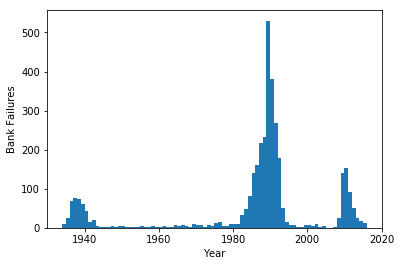

In [105]:
plt.hist(banks['Failure Year'], bins=range(1934,2017))
plt.xlabel('Year')
plt.ylabel('Bank Failures')

The histogram above (figure 1) clearly clusters around three periods of time 1940's, 1980's-1990's, and the early 2000's where US bank failures were the highest in history. This gives a general sense of which banks failed more frequently and which banks incured the highest losses, this raises another important question of which types of banks are responsible for each of these major periods of failure? 

The plot below (figure 2) is the next step to finding the answer to the above question. In this plot each institution is spereated from each other and graphed over time. This makes it easier to compare, especially with different colored markers for corresponding banks via one plot with each kind of bank charted and superimposed upon each other.

In [1]:
failure_year_type = banks.groupby(['Failure Year', 'Institution Type'], as_index=False)['Institution Name'].agg('count')
failure_year_type.columns=['Failure Year', 'Institution Type', 'Number of Failures']

failure_year_comm = failure_year_type[failure_year_type['Institution Type']=='COMMERCIAL BANK']
failure_year_savea = failure_year_type[failure_year_type['Institution Type']=='SAVINGS ASSOCIATION']
failure_year_saveb = failure_year_type[failure_year_type['Institution Type']=='SAVINGS BANK']


failure_year_all = failure_year_type[(failure_year_type['Institution Type']=='COMMERCIAL BANK') | (failure_year_type['Institution Type']=='SAVINGS ASSOCIATION') | (failure_year_type['Institution Type']=='SAVINGS BANK')]
failure_year_all = failure_year_all.groupby('Failure Year', as_index=False)['Number of Failures'].agg('sum')

plt.plot(failure_year_comm['Failure Year'], failure_year_comm['Number of Failures'], 'b-')
plt.plot(failure_year_savea['Failure Year'], failure_year_savea['Number of Failures'], 'r-')
plt.plot(failure_year_saveb['Failure Year'], failure_year_saveb['Number of Failures'], 'm-')
plt.plot(failure_year_all['Failure Year'], failure_year_all['Number of Failures'], 'g--')



plt.xlabel('Year')
plt.ylabel('Institution Failures')
plt.legend(['Commercial Bank', 'Savings Assn', 'Savings Bank', 'All'])

NameError: name 'banks' is not defined

In [124]:
#Exploring varience analysis and possibility for forcasting
#scipy.stats.f_oneway¶

The plot above shows how in the beginning commercial banks were largely responsible for the most failures in the fisrt period. This changes in the second period when savings associations take on this burden where at their peak out failed commercial banks. In the third period the commercial banks take the lead in failures once again emulating the patterned from period 1. It can be concluded that the period of the 1980's recession had the most failures. Saving association banks failed more that commercial and Savings banks on avergage but not in every peiod. Since we know that during the 1930's - 40's, commercial banks were the biggest failures. And the recent recession of the 2000's show a similar pattern to that of the great depression where commercial banks also failed most.

Want to show statistically that the Estimated Loss for the various types of banks are different.  T-test doesn't apply since data not normal. So, we use the pearson test on Estimated Loss (2015)

In [83]:
from scipy.stats import mannwhitneyu 

savings_assn = banks[banks['Institution Type']=='SAVINGS ASSOCIATION']
savings = banks[banks['Institution Type']=='SAVINGS BANK']
commercial = banks[banks['Institution Type']=='COMMERCIAL BANK']

u, p = mannwhitneyu(savings_assn['Estimated Loss (2015)'], savings_assn['Estimated Loss (2015)'])
print((u, p))


u, p = mannwhitneyu(savings['Estimated Loss (2015)'], savings['Estimated Loss (2015)'])
print((u, p))


u, p = mannwhitneyu(commercial['Estimated Loss (2015)'], commercial['Estimated Loss (2015)'])
print((u, p))

(236837.0, 0.39877022445475974)
(53753.0, 0.49367152926755947)
(2719804.5, 9.4379580737865157e-11)


## Analytic Question 2 
**Which bank cost the government most to resolve in each period, and how do these institutions compare relative to other banks within each period?**

This question is interesting because we already know which general periods of time that the majority of financial institutions failed, but we don't know the financial loss of the biggest failure in each period. Nor dow we yet know how that largest failed bank compares to the second, third, fourth biggest failures in each period. Do any interesting patterns emerge? 

It's important to note that loss and cost are also synonymous with each other representing the cost to the government.

Since there isn't enough data on estimated losses (2015) beyond 1988.I've decided to import an inflation multiplier to adjust total assets for inflation and use this new metric as a proxy to compare and contrast losses across all periods.

Using this new metric to measure losses; we divide the data into the three periods or "ranges" of time. These specific ranges will be as follows: 
year_range_1(1934, 1943)
year_range_2(1980, 1990)
year_range_3(2000, 2015)

These ranges are in keeping with the time frames we sorted earlier in answering question one where a histogram can show you those ranges more clearly (ref figure 1 above)

Below is where we read the file and define the new banks_inflation data frame and see the values that the data is organized under. 

In [84]:
conversion_df = pd.read_csv('inflation.csv')
banks_inflation = pd.merge(banks, conversion_df, left_on='Failure Year', right_on='year')
banks_inflation.columns

Index(['Financial Institution Number', 'Institution Name', 'Institution Type',
       'Charter Type', 'Headquarters', 'Failure Date', 'Insurance Fund',
       'Certificate Number', 'Transaction Type', 'Total Deposits',
       'Total Assets', 'Estimated Loss (2015)', 'Failure Year', 'City',
       'State', 'year', 'inflation_multiplier'],
      dtype='object')

Below we do two things:

1. We create a table that converts 2015 vals to 2017 vals; 2017 values are what I chose so as to be as current as possible to a ubiquitious inflation rate.

2. We then sort the values by Institution Name and Total Assets (2015) and we plot those values to compare their bar plots to determine if there is a correlation. 


In the following cell's block of code I attempted to test two data samples; 'Total Assets (2015)', and 'Estimated Loss (2015)'. I implemented the following peasrson test for normal distribution, since the data are normally distibuted.

0.153710307701 9.82136388207e-15


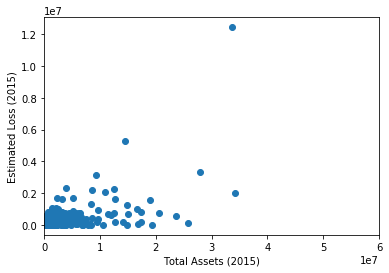

In [85]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier'] 
plt.scatter(banks_inflation['Total Assets (2015)'], banks_inflation['Estimated Loss (2015)']) 
plt.xlabel('Total Assets (2015)') 
plt.ylabel('Estimated Loss (2015)') 
plt.xlim([0, 0.6e8])

bankst = banks_inflation.dropna(subset=['Total Assets (2015)', 'Estimated Loss (2015)', 'Total Assets']) 
x, y = pearsonr(bankst['Total Assets'], bankst['Estimated Loss (2015)']) 
print(x, y)

Above we can see that most of the banks(data points) on this graph cluster between 0 and 1 for assets and 0 and .2 for Losses. Implying that there is a positive correlation between Total Assests and Estimated Loss.

Below I've created summary statistics for each variable tested for, Estimated Loss (2015) and Total Assets. This is to show how differently distributed the two values were before we brought the sets of data were compared.

In [86]:
banks.groupby(['Institution Type'])['Estimated Loss (2015)'].describe()

,count,mean,std,min,25%,50%,75%,max
Institution Type,,,,,,,,
COMMERCIAL BANK,1619.0,41835.451513,139013.822067,0.0,3180.00,8857.0,30081.0,3330263.0
SAVINGS ASSOCIATION,572.0,106485.405594,282282.109304,-551.0,7208.00,24116.0,73533.5,3142552.0
SAVINGS BANK,318.0,152847.254717,780479.657822,-4386.0,7977.25,25392.5,93980.5,12438005.0


In [87]:
banks.groupby(['Institution Type'])['Total Assets'].describe()

,count,mean,std,min,25%,50%,75%,max
Institution Type,,,,,,,,
COMMERCIAL BANK,2315.0,1.795535e+05,8.938253e+05,14.0,9706.0,27090.0,98846.0,25455112.0
SAVINGS ASSOCIATION,691.0,4.505859e+05,1.084308e+06,4816.0,54397.5,127005.0,319666.0,13382327.0
SAVINGS BANK,327.0,1.900526e+06,1.712776e+07,4008.0,64505.0,174717.0,643582.5,307021614.0


Below we sort the values adjeusted for inflation by Institution Name and Total Assets (2015). 
Then we plot those values and compare the bar plots of each period of time. These peiods are labled as ranges of time in the code below, for instance, the first period's "range(1934, 1943)". The corresponding graphs for each period or "range" is also found below starting with the aformentioned range from left to right. The goal for these graphs is to convey the scale of how removed the largest failed bank's assets are to the next.

(<matplotlib.axes._subplots.AxesSubplot at 0x10c1b7400>,)

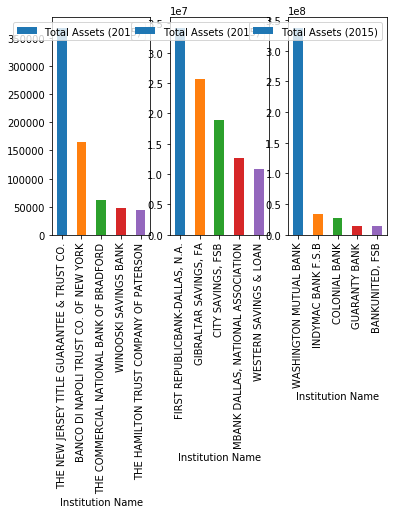

In [88]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)
banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).head(5)
banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).head(5)

fig, axes = plt.subplots(nrows=1, ncols=3)
banks_1.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[0]), 
banks_2.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[1]), 
banks_3.plot.bar(x='Institution Name', y='Total Assets (2015)', ax=axes[2]), 

The biggest asset bank is quite removed from the other banks. In the first period the largest bank is removed from the others by a factor of 2. In the second not by much, maybe by 500,000. In the third by a factor of 7.

Next > I could probably try to compute some summary stat about how big the largest bank was relative to second or how many banks underneath the first it takes for the total assets to be comparable.

build in a bit of narrative around **summary statistics** explaining what is going on with this question and why it is interesting. 

Text(0.5,0,'')

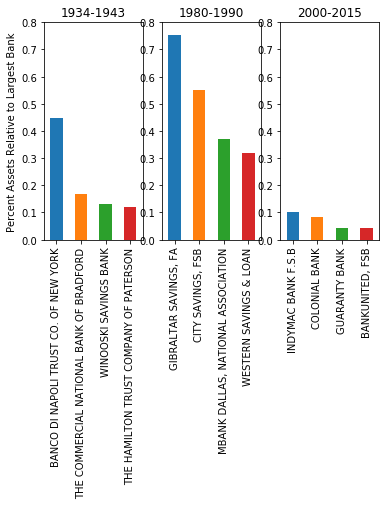

In [89]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)
banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).head(5)
#banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5] 
banks_1['total_assets_normalized']=banks_1['Total Assets (2015)']/banks_1['Total Assets (2015)'].iloc[0]
banks_1 = banks_1.iloc[1:5]

banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).head(5)
#banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5]
banks_2['total_assets_normalized']=banks_2['Total Assets (2015)']/banks_2['Total Assets (2015)'].iloc[0]
banks_2 = banks_2.iloc[1:5]


banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).head(5) 
#banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)].sort_values('Total Assets (2015)', ascending=False).iloc[1:5]
banks_3['total_assets_normalized']=banks_3['Total Assets (2015)']/banks_3['Total Assets (2015)'].iloc[0]
banks_3 = banks_3.iloc[1:5]

fig, axes = plt.subplots(nrows=1, ncols=3)
banks_1.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[0],legend=False, ylim=(0,.8),title='1934-1943')

banks_2.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[1],legend=False, ylim=(0,.8),title='1980-1990')


banks_3.plot.bar(x='Institution Name', y='total_assets_normalized', ax=axes[2],legend=False, ylim=(0,.8),title='2000-2015')

axes[0].set_xlabel("")
axes[0].set_ylabel("Percent Assets Relative to Largest Bank")
axes[1].set_xlabel("")
axes[2].set_xlabel("")

In the first period the size of the assets of the next largest bank (Banco Di Napoli CO. of New York) is about 45% of the assets of the first largest bank (The New Jersey Title Guarantee & Trust CO.)

Gibraltar Savings, FA is a little more than 75% of First RepublicBank-Dallas, N.A. in the second period

In the third period we see again that Indymac bank F.S.B. pails in comparison of the largest bank to fail in its period of history as a mere 10% of Washington Mutual Bank.

In [90]:
banks_inflation.groupby(['Institution Type'])['Total Assets (2015)'].agg(['mean','std','count'])

,mean,std,count
Institution Type,,,
COMMERCIAL BANK,2.673818e+05,1.356841e+06,2315
SAVINGS ASSOCIATION,8.367140e+05,2.014593e+06,691
SAVINGS BANK,2.482396e+06,1.890531e+07,327


## Analytic Question 3
**How have bank failures differed by states over time?** 

1. Which states had the highest failures?
2. Which states cost the government the most to resolve?
3. Is there a correlation between bank failures and cost?


One challenge I face specific to this question is my understanding of what role population plays in the number of failures. Going forward Population density is a factor I'd like to include.

In this question I am building on the second question's quest to understand the cost to a state and federal government at large. The states will be substrated from each range to discover which state in fact had the highest failures and cost the most to resolve. What cost they incured collectively as a state rather than which type of institution and which bank specifically was responsible. In fact I'm curious tho know if those particular banks are apart of a larger problem.

To do I will follow the aformentioned ranges. Next I will break up failures into the three major time periods. Then compute counts and losses for each state per period and plot the results in a bar blot with subplots for each period.

In [91]:
len(banks)

3484

Of the 3,484 financial institutions in this dataset, and across the whole range of time, which states had the highest failures? We'll delve into this question with the `State` variable in mind. Below we are plotting the histogram of the Bank Failure by State and print the States with the top 5 banks failures. I decided to go with a histogram; ordered alphabetically and numerically and supplement it with a color coordinated plot sorted by just bank failures. It shows the states on the  axis clearly, and the number of failures clearly as well in incraments of 100.

,State,Institution Name
44,TX,736
4,CA,236
14,IL,181
9,FL,178
37,OK,170


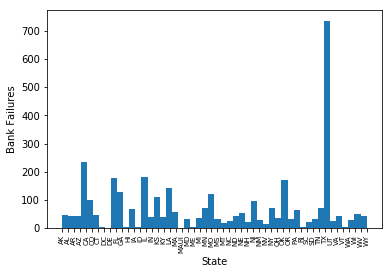

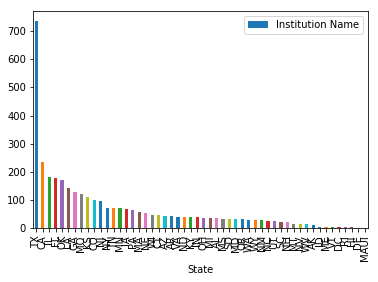

In [111]:
plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('State')
plt.ylabel('Bank Failures')

banks_by_state = banks.groupby('State', as_index=False)['Institution Name'].agg('count').sort_values(by='Institution Name',ascending=False)
banks_by_state.plot.bar(x='State',y='Institution Name')
banks_by_state.sort_values(by='Institution Name', ascending=False).iloc[0:5]

The tables above show that, Texas is by far the state with the largest amount of bank failures of any type and across all periods of time in the USA in aggregate.

Is Texas also responsible for the most losses? Even though it has the most failures, we know from question 2 that savings banks as few failed as there are, were responsible for the most losses. Therefore its possible that a state as large as Texas could not be responsible for costing the most damage to the government. Below we quickly plot a histogram to show how rsponsible Texas is for the overall losses.

Text(0,0.5,'Estimated Loss (2015)')

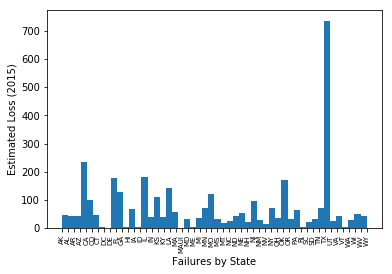

In [119]:
plt.hist(banks['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')

#banks_by_state = banks.groupby('State', as_index=False)['Estimated Loss (2015)'].agg('count')
#banks_by_state.sort_values(by='Estimated Loss (2015)', ascending=False).iloc[0:5]

Next we delve deeper into the amount of losses for each state within each period and create three subplots to visualize this. 

Text(0,0.5,'Estimated Loss (2015)')

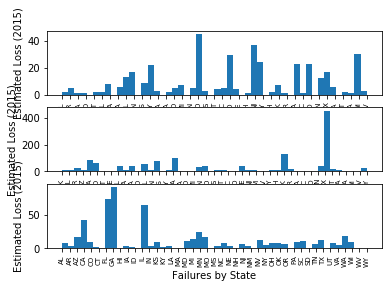

In [95]:
banks_inflation['Total Assets (2015)']=banks_inflation['Total Assets']*banks_inflation['inflation_multiplier']
year_range_1 = range(1934, 1943)
year_range_2 = range(1980, 1990)
year_range_3 = range(2000, 2015)

banks_1 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_1)]
banks_2 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_2)]
banks_3 = banks_inflation[banks_inflation['Failure Year'].isin(year_range_3)]


plt.subplot(3,1,1)
plt.hist(banks_1['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')

plt.subplot(3,1,2)
plt.hist(banks_2['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')

plt.subplot(3,1,3)
plt.hist(banks_3['State'],bins=50)
plt.xticks(fontsize=7,rotation=90)
plt.xlabel('Failures by State')
plt.ylabel('Estimated Loss (2015)')

In the beginning it looks like Montana and West Virginia are the leaders in the Estimated Losses of their time period, ranging from 1934 to 1943

So it seems the story has changed and Texas hasn't always been a failed state when it comes to banks. If we look at Texas' place on the graph following it down throught each graph and time we see that the state had less losses from bank failures than West Viginia or Montana. In the second graph from the top we see that this is the period of time were most of the bank failures and their losses stem from. 

Lastly and surprisingly Florida, Georgia, and Illinois are the juggernauts of the modern age of losses. 

Finally we discover what the losses were for all states. Then we take the average losses of each state and show this data from highest average losses to lowest average losses. 

Texas lost 6 times as much as the next most failing state, California. And the rest of the banks were relatively the same. 

Since we have already seen the three big periods to failures, it might be cool to see how bad the worst failures of each period were in 2015 USD. The biggest number of failures were 80s, but it looks like 2000s cost the most?

I am noticing a lot of edits other than the explanatory text for Question 2 (which is actually pretty good).  You need to do a lot of work on the explanation for the intro and Question 1 (you are still relying on inline comments with your code instead of markdown).  You also need to do some major work on question 3.  Right now it looks like two quick summary plots without any interesting conclusions or statistical work.

I would suggest you keep working on this and also get your third question finished.  This will involve you separating out failures by state for the three major time periods.
